In [ ]:
import torch , torchvision
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms

In [ ]:
transforms = transforms.Compose([
    transforms.ToTensor()
])

train_dataset = torchvision.datasets.MNIST(root='data',train=True,download=True,transform=transforms)
val_dataset = torchvision.datasets.MNIST(root='data',train=False,download=True,transform=transforms)

print(f"Train Dataset : {len(train_dataset)}")
print(f"Validation Dataset : {len(val_dataset)}")

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=32, shuffle=False)


100%|██████████| 9912422/9912422 [00:00<00:00, 64778543.35it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 74361997.44it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 27701905.02it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 8340861.98it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



Train Dataset : 60000
Validation Dataset : 10000


In [ ]:
print(train_dataset[0])

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

In [ ]:
#testing
test = torch.nn.Conv2d(in_channels=1, out_channels=20 , kernel_size=5,stride=1,padding=0)
test1 = torch.nn.Conv2d(in_channels=20,out_channels=50, kernel_size=5 , stride=1, padding=0)
test3 = nn.Linear(4*4*50, 10)

x = test(train_dataset[0][0])
print(f"First layer : {x.shape}")
x = F.max_pool2d(x,2,2)
print(f"Pool layer : {x.shape}")
x = test1(x)
print(f"Second layer : {x.shape}")
#x = F.max_pool2d(x,2,2)
print(f"Pool layer : {x.shape}")
x = x.view(-1, 4*4*50)
print(f"After View : {x.shape}")
x = test3(x)
print(f"Third layer FC: {x.shape}")
print(x)
x = F.softmax(x,1)
print(x)

First layer : torch.Size([20, 24, 24])
Pool layer : torch.Size([20, 12, 12])
Second layer : torch.Size([50, 8, 8])
Pool layer : torch.Size([50, 8, 8])
After View : torch.Size([4, 800])
Third layer FC: torch.Size([4, 10])
tensor([[-0.0210,  0.2186, -0.1163, -0.0604,  0.0164,  0.1068, -0.0139, -0.0890,
         -0.2024, -0.0584],
        [-0.0257, -0.1671,  0.0045, -0.0753,  0.0383, -0.0634,  0.1605, -0.0361,
          0.0171, -0.0279],
        [-0.0526,  0.0288, -0.0592, -0.0046,  0.1571,  0.1117,  0.1556, -0.0232,
          0.0056, -0.0750],
        [-0.2469, -0.1555, -0.0474,  0.0892,  0.1956, -0.1623,  0.0975, -0.0048,
         -0.2473, -0.0378]], grad_fn=<AddmmBackward0>)
tensor([[0.0995, 0.1264, 0.0904, 0.0956, 0.1032, 0.1130, 0.1002, 0.0929, 0.0830,
         0.0958],
        [0.0989, 0.0858, 0.1019, 0.0941, 0.1054, 0.0952, 0.1191, 0.0978, 0.1032,
         0.0986],
        [0.0923, 0.1001, 0.0917, 0.0968, 0.1138, 0.1087, 0.1136, 0.0950, 0.0978,
         0.0902],
        [0.0815, 0.

In [ ]:
# CNN
class Net(nn.Module):
  def __init__(self,num_classes=10):
    super().__init__()
    self.conv1 = torch.nn.Conv2d(in_channels=1, out_channels=30 , kernel_size=3,stride=1,padding=0)
    self.conv2 = torch.nn.Conv2d(in_channels=30,out_channels=50, kernel_size=5 , stride=1, padding=0)
    self.fc3 = torch.nn.Linear(4*4*50,1000)
    self.fciadd = torch.nn.Linear(1000,600)
    self.dropout1 = nn.Dropout(0.5)
    self.fc4 = torch.nn.Linear(600,num_classes)
  
  def forward(self, x):
    x = self.conv1(x)
    x = F.relu(x)
    x = F.max_pool2d(x,2,2)
    x = self.conv2(x)
    x = F.relu(x)
    x = F.max_pool2d(x,2,2)

    x = x.view(-1,4*4*50)
  
    x = F.relu(self.fc3(x))
    x = F.relu(self.fciadd(x))
    x = self.dropout1(x)
    x = self.fc4(x)
    x = F.softmax(x,1)
    return x

In [ ]:
device = 'cpu'
model = Net()
model.to(device)

for name, param in model.named_parameters():
    if param.requires_grad:
        print(f"Lapisan {name} memiliki jumlah parameter: {param.numel()}")

Lapisan conv1.weight memiliki jumlah parameter: 270
Lapisan conv1.bias memiliki jumlah parameter: 30
Lapisan conv2.weight memiliki jumlah parameter: 37500
Lapisan conv2.bias memiliki jumlah parameter: 50
Lapisan fc3.weight memiliki jumlah parameter: 800000
Lapisan fc3.bias memiliki jumlah parameter: 1000
Lapisan fciadd.weight memiliki jumlah parameter: 600000
Lapisan fciadd.bias memiliki jumlah parameter: 600
Lapisan fc4.weight memiliki jumlah parameter: 6000
Lapisan fc4.bias memiliki jumlah parameter: 10


In [ ]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.0003)


In [ ]:
import torch
import torch.nn.functional as F

def custom_cross_entropy_loss(input, target):
    # Apply log to input
    log_probs = F.log_softmax(input, dim=1)
    
    # Gather log probabilities for target classes
    target_log_probs = log_probs.gather(1, target.unsqueeze(1)).squeeze(1)
    
    # Calculate negative log likelihood loss
    loss = -target_log_probs.mean()
    
    return loss

# Example input and target (after applying softmax)
input = torch.tensor([[0.3, 0.6, 0.1], [0.8, 0.1, 0.1],[0.8, 0.1, 0.1]])
target = torch.tensor([0, 1, 2])

# Calculate the loss using the custom function
loss = custom_cross_entropy_loss(input, target)

print(loss)
print(criterion(input,target))


tensor(1.3109)
tensor(1.3109)


In [ ]:
training_loss_history = []
training_corrects_history = []

val_loss_history = []
val_corrects_history = []

In [1]:
for e in range(1) :
  # Drop out Aktif
  model.train()
  running_loss = 0.0
  running_corrects = 0.0

  val_running_loss = 0.0
  val_running_corrects = 0.0

  CounterTraining = 0
  CounterVal = 0
  for inputs,labels in train_loader:
    inputs = inputs.to(device)
    labels = labels.to(device)

    outputs = model(inputs)
    loss = criterion(outputs,labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    _,preds = torch.max(outputs,1)

    running_loss += loss.item()
    running_corrects += torch.sum(preds == labels.data)
    #print(torch.sum(preds == labels.data))
    CounterTraining += 1

  else:
    with torch.no_grad():
      #Drop Out Mati
      model.eval()
      for val_inputs,val_labels in val_loader:
        val_inputs = val_inputs.to(device)
        val_labels = val_labels.to(device)

        #foward Propagation
        val_outputs = model(val_inputs)
        #calculate loss
        val_loss = (criterion(val_outputs,val_labels))
        #predictions
        _,val_preds = torch.max(val_outputs,1)
        #update val running loss
        val_running_loss += val_loss.item()
        #update val accuracy
        val_running_corrects += torch.sum(val_preds == val_labels.data)
        CounterVal += 1
  #Calculate Training Loss
  epoch_loss = running_loss/len(train_loader.dataset)
  training_loss_history.append(epoch_loss)

  # Calculate Training Accuracy
  epoch_acc = running_corrects.float()/len(train_loader.dataset)
  training_corrects_history.append(epoch_acc)


  #Calculate Validation Loss
  val_epoch_loss = val_running_loss/len(val_loader.dataset)
  val_loss_history.append(val_epoch_loss)

  #Calculate Validation Accuracy
  val_epoch_acc = val_running_corrects.float()/len(val_loader.dataset)
  val_corrects_history.append(val_epoch_acc)
  # Priniting the epoch, loss and accuracy
  print('Epoch :', (e+1))
  print('Training loss: {:.4f}, Training accuracy {:.4f} '.format(epoch_loss, epoch_acc.item()) , 'Jumlah Data Training : ' ,CounterTraining )
  print('Validation loss: {:.4f}, Validation accuracy {:.4f} '.format(val_epoch_loss, val_epoch_acc.item()) , 'Jumlah Data Validation : ', CounterVal)

NameError: ignored

In [ ]:
model.train()
print(model(train_dataset[0][0]))
model.eval()
print(model(train_dataset[0][0]))
print(model(train_dataset[0][0]))
print(train_dataset[0][1])

RuntimeError: ignored

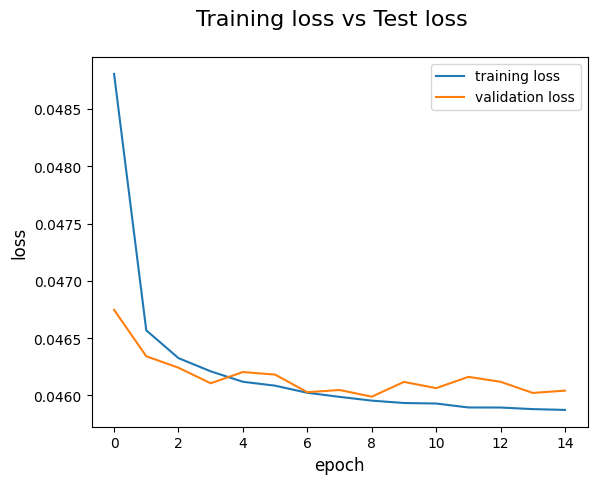

In [ ]:
#plot the training and validation loss
plt.plot(training_loss_history, label='training loss')
plt.plot(val_loss_history, label='validation loss')
plt.suptitle('Training loss vs Test loss', fontsize=16)
plt.xlabel('epoch', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.legend()

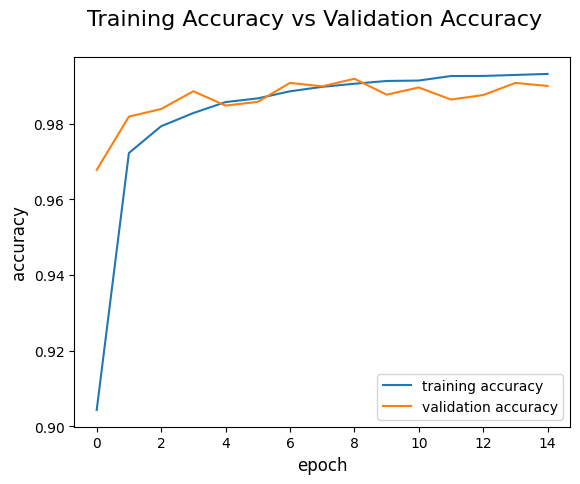

In [ ]:
#plot the training and validation accuracy

#if training with cuda
training_corrects_history = [i.item() for i in training_corrects_history]
val_corrects_history = [i.item() for i in val_corrects_history]

plt.plot(training_corrects_history, label='training accuracy')
plt.plot(val_corrects_history, label='validation accuracy')
plt.suptitle('Training Accuracy vs Validation Accuracy', fontsize=16)
plt.xlabel('epoch', fontsize=12)
plt.ylabel('accuracy', fontsize=12)
plt.legend()

In [ ]:
import plotly.graph_objects as go

# Membuat data
x = [1, 2, 3, 4, 5]
y = [5, 4, 3, 2, 1]
z = [1, 3, 2, 4, 5]

# Membuat plot 3D
fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z, mode='markers')])

# Menampilkan plot
fig.show()

In [ ]:
#Data Visualization in 3D
import plotly.graph_objects as go
import numpy as np

# Fungsi cost
def cost_function(x, y):
    return x**2 + y**2

# Membuat data koordinat x, y
x = np.linspace(-5, 5, 5)
y = np.linspace(-5, 5, 5)
x, y = np.meshgrid(x, y)
print(x)
print(y)

# Menghitung nilai cost function
z = cost_function(x, y)
print(z)

# Membuat plot permukaan 3D
fig = go.Figure(data=[go.Surface(x=x, y=y, z=z)])

# Menampilkan plot
fig.show()



[[-5.  -2.5  0.   2.5  5. ]
 [-5.  -2.5  0.   2.5  5. ]
 [-5.  -2.5  0.   2.5  5. ]
 [-5.  -2.5  0.   2.5  5. ]
 [-5.  -2.5  0.   2.5  5. ]]
[[-5.  -5.  -5.  -5.  -5. ]
 [-2.5 -2.5 -2.5 -2.5 -2.5]
 [ 0.   0.   0.   0.   0. ]
 [ 2.5  2.5  2.5  2.5  2.5]
 [ 5.   5.   5.   5.   5. ]]
[[50.   31.25 25.   31.25 50.  ]
 [31.25 12.5   6.25 12.5  31.25]
 [25.    6.25  0.    6.25 25.  ]
 [31.25 12.5   6.25 12.5  31.25]
 [50.   31.25 25.   31.25 50.  ]]
